## Miniproject 2: MovieLens Visualization



In [77]:
import numpy as np
import matplotlib.pyplot as plt

### Download data

In [78]:
import requests

url_dict = {
     'data.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/data.csv',
     'movies.csv': 'https://caltech-cs155.s3.us-east-2.amazonaws.com/sets/miniprojects/project2/data/movies.csv'
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

download_file('data.csv')
download_file('movies.csv')

Start downloading...
Complete
Start downloading...
Complete


In [79]:
import pandas as pd

data = pd.read_csv('data.csv')
movies = pd.read_csv('movies.csv')

data_np = data.to_numpy();
movies_np = movies.to_numpy();

## Visualize Data

## Visualize all ratings

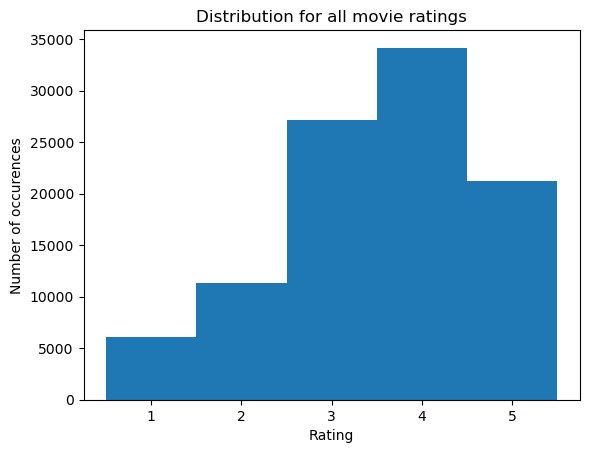

In [80]:
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[:,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Distribution for all movie ratings")
plt.show()

# Visualize ratings for 10 most popular movies

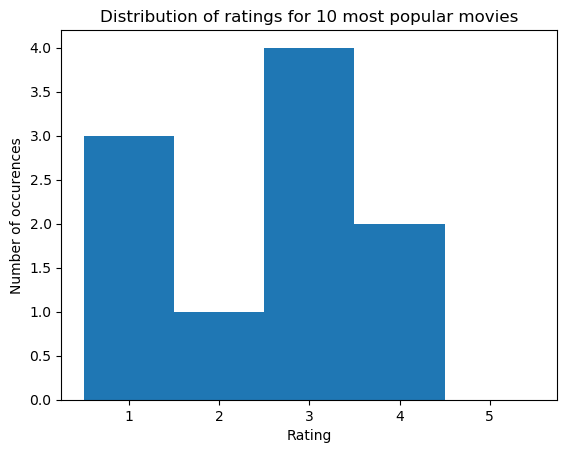

In [81]:
# count number of times that a movie is rated
nMovies = movies.shape[0]
countVec = np.zeros(nMovies)
for ndx in range(data.shape[0]):
    thisMovie = data_np[ndx,1] - 1;
    countVec[thisMovie] += 1;

# get top 10 most rated movies
indexListSort = countVec.argsort()
indexListMostRated = np.flipud(indexListSort[-10:])

# visualize
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[indexListMostRated,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Distribution of ratings for 10 most popular movies")
plt.show()

## Visualize ratings for 10 best-rated movies

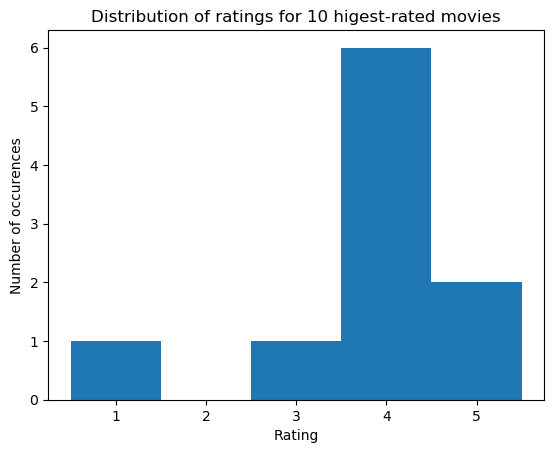

In [82]:
# get average rating of movie
nMovies = movies.shape[0]
rateVec = np.zeros(nMovies)
for ndx in range(data.shape[0]):
    thisMovie = data_np[ndx,1] - 1;
    rateVec[thisMovie] += data_np[ndx,2];
for ndx in range(data.shape[0]):
    thisMovie = data_np[ndx,1] - 1;
    rateVec[thisMovie] = rateVec[thisMovie] / countVec[thisMovie];

# get top 10 most rated movies
indexListSort = rateVec.argsort()
indexListTopRated = np.flipud(indexListSort[-10:])

# visualize
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[indexListTopRated,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Distribution of ratings for 10 higest-rated movies")
plt.show()

## Visualize 3 genres of choice

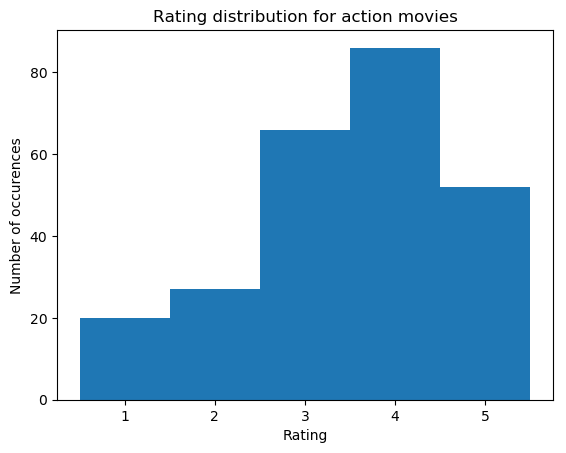

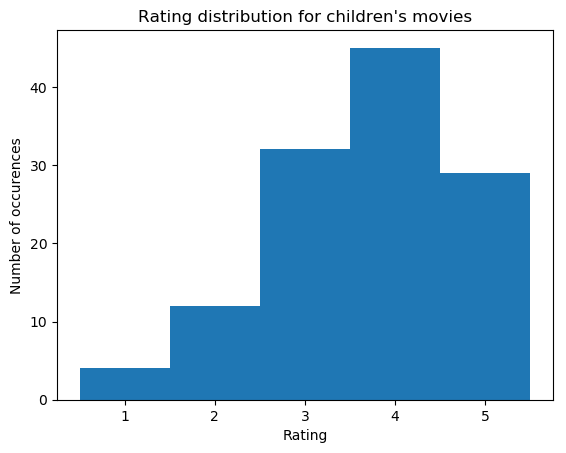

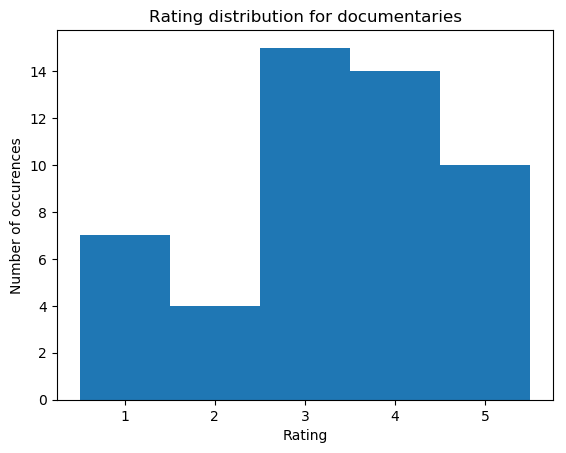

In [83]:
# Action, Children's, Documentary
actionID = []
childID = []
docID = []

for ndx in range(movies_np.shape[0]):
    if movies_np[ndx,3]:
        actionID.append(movies_np[ndx,0])
    if movies_np[ndx,6]:
        childID.append(movies_np[ndx,0])
    if movies_np[ndx,9]:
        docID.append(movies_np[ndx,0])

# visualize action movies
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[actionID,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Rating distribution for action movies")
plt.show()

# visualize children's movies
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[childID,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Rating distribution for children's movies")
plt.show()

# visualize documentaries movies
binVec = np.linspace(0,5,6) + 0.5
counts, bins = np.histogram(data_np[docID,2],bins=binVec)
plt.hist(bins[:-1],bins,weights=counts)
plt.xlabel("Rating")
plt.ylabel("Number of occurences")
plt.title("Rating distribution for documentaries")
plt.show()